### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
#宣告
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import Sequential 
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D


Using TensorFlow backend.


(576, 768, 3)


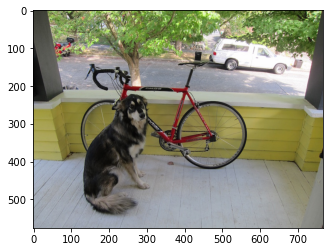

In [2]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
#!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
image=cv2.imread('../Data/dog_yolo.jpg')
print(image.shape)
#ax.imshow(image)

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)

In [3]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
#作業: 接續搭建一個 4 個 3*3 的 filters 
model.add(Conv2D(1,(3,3),activation='relu'))
model.add(Conv2D(1,(3,3),activation='relu'))
model.add(Conv2D(1,(3,3),activation='relu'))
model.add(Conv2D(1,(3,3),activation='relu'))


print(model.summary())
#權重都是亂數值

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 574, 766, 1)       28        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 572, 764, 1)       10        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 570, 762, 1)       10        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 568, 760, 1)       10        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

(1, 576, 768, 3)


In [5]:
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
print(image_conv.shape)
img=np.squeeze(image_conv,axis=0)
print(img.shape)


(1, 568, 760, 1)
(568, 760, 1)


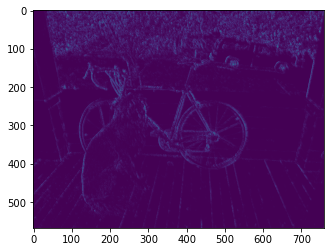

In [6]:
plt.imshow(img[:,:,0])